# Project Title : Cardiovascular Risk Prediction
## Project type - Classification

### Index:
1.Problem statement

2.Importing the libraries and the dataset

3.Understand the data

4.Data Wrangling

5.Handling missing data

6.Data Visualization

7.Feature selection

8.Data preprocessing

9.ML model implementation

10.Results

11.Summary and conclusions

12.References

# 1. Problem Statement:
1.Cardiovascular diseases (CVDs) are the major cause of mortality worldwide. According to WHO, 17.9 million people died from CVDs in 2019, accounting for 32% of all global fatalities.
2.Though CVDs cannot be treated, predicting the risk of the disease and taking the necessary precautions and medications can help to avoid severe symptoms and, in some cases, even death.
3.As a result, it is critical that we accurately predict the risk of heart disease in order to avert as many fatalities as possible.

#### Demographic:
Sex: male or female ("M" or "F")

Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Education: The level of education of the patient (categorical values - 1,2,3,4)

#### Behavioral:
is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

#### Medical (history):
BP Meds: whether or not the patient was on blood pressure medication (Nominal)

Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

Diabetes: whether or not the patient had diabetes (Nominal)

#### Medical (current):
Tot Chol: total cholesterol level (Continuous)

Sys BP: systolic blood pressure (Continuous)

Dia BP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of 
possible values.)

Glucose: glucose level (Continuous)

#### Predict variable (desired target):
TenYearCHD: 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

In [96]:
#Importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, classification_report
from sklearn.metrics import plot_confusion_matrix, plot_precision_recall_curve, plot_roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from sklearn import tree

from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing  import OneHotEncoder
from sklearn import ensemble
from collections import Counter

%matplotlib inline

# Impoting data preprocessing libraries
from sklearn.preprocessing import MinMaxScaler

# Importing model selection libraries.
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Importing metrics for model evaluation.
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import classification_report, plot_confusion_matrix, ConfusionMatrixDisplay

# Importing machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [8]:
# The code was removed by Watson Studio for sharing.

# 1.Understanding The Data

In [9]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [10]:
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [11]:
df.shape

(3390, 17)

In [12]:
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [13]:
df.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3390.0,1694.500000,978.753033,0.00,847.25,1694.50,2541.75,3389.0
age,3390.0,49.542183,8.592878,32.00,42.00,49.00,56.00,70.0
education,3303.0,1.970936,1.019081,1.00,1.00,2.00,3.00,4.0
cigsPerDay,3368.0,9.069477,11.879078,0.00,0.00,0.00,20.00,70.0
BPMeds,3346.0,0.029886,0.170299,0.00,0.00,0.00,0.00,1.0
prevalentStroke,3390.0,0.006490,0.080309,0.00,0.00,0.00,0.00,1.0
prevalentHyp,3390.0,0.315339,0.464719,0.00,0.00,0.00,1.00,1.0
diabetes,3390.0,0.025664,0.158153,0.00,0.00,0.00,0.00,1.0
totChol,3352.0,237.074284,45.247430,107.00,206.00,234.00,264.00,696.0
sysBP,3390.0,132.601180,22.292030,83.50,117.00,128.50,144.00,295.0


#### We get to know the following points about our dataset:

1.The dataset contains 3390 rows and 17 columns.

2.'sex' and 'is_smoking' feature is of object dype and rest others are numeric in nature.

3.The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has   a 10-year risk of future coronary heart disease (CHD).

4.The dataset provides the patients’ information. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.

# 2.Data Wrangling

### 2.1.Treating Duplicate Values

In [16]:
df.duplicated().sum()

0

### 2.2.Treating Missing Values 

In [17]:
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [18]:
df['glucose'].fillna(df['glucose'].median(), inplace=True)
df['education'].fillna(df['education'].mode()[0], inplace=True)
df['BPMeds'].fillna(df['BPMeds'].mode()[0], inplace=True)
df['totChol'].fillna(df['totChol'].median(), inplace=True)
df['cigsPerDay'].fillna(df['cigsPerDay'].mean(), inplace=True)
df['BMI'].fillna(df['BMI'].median(), inplace=True)
df['heartRate'].fillna(df['heartRate'].median(), inplace=True)

In [19]:
df.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### We get to know the following points about our dataset:

1.The dataset don't have any duplicated observations.

2.The dataset contains 510 missing values.

3.In the 'education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', and 'glucose', there are missing values.

### 2.3.Treating Outliers

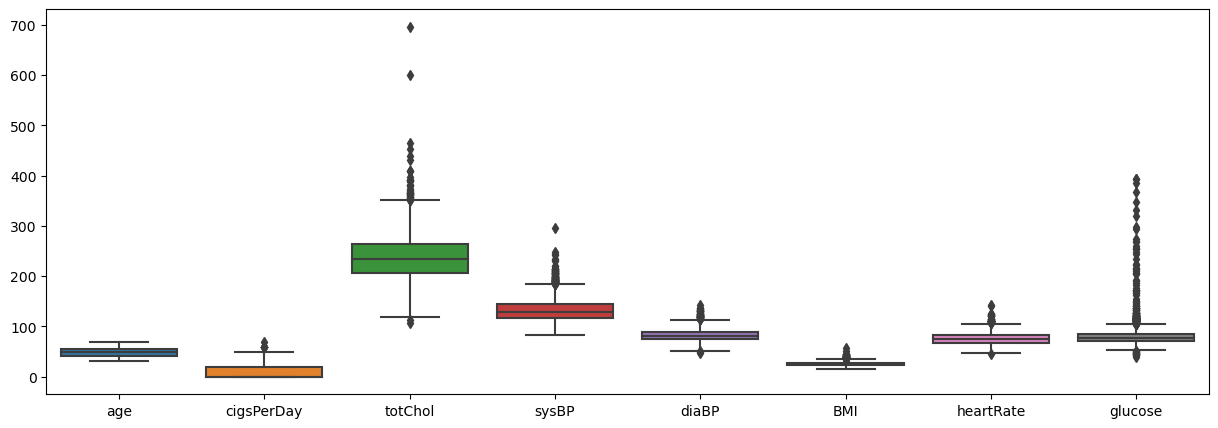

In [26]:
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=df[numeric_features])
plt.show() 

There are outliers but within the possible range of values.

In [27]:
def clip_outliers(df):
    for col in df[numeric_features]:
        # using IQR method to define range of upper and lower limit.
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        
        # replacing the outliers with upper and lower bound
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [28]:
df = clip_outliers(df)

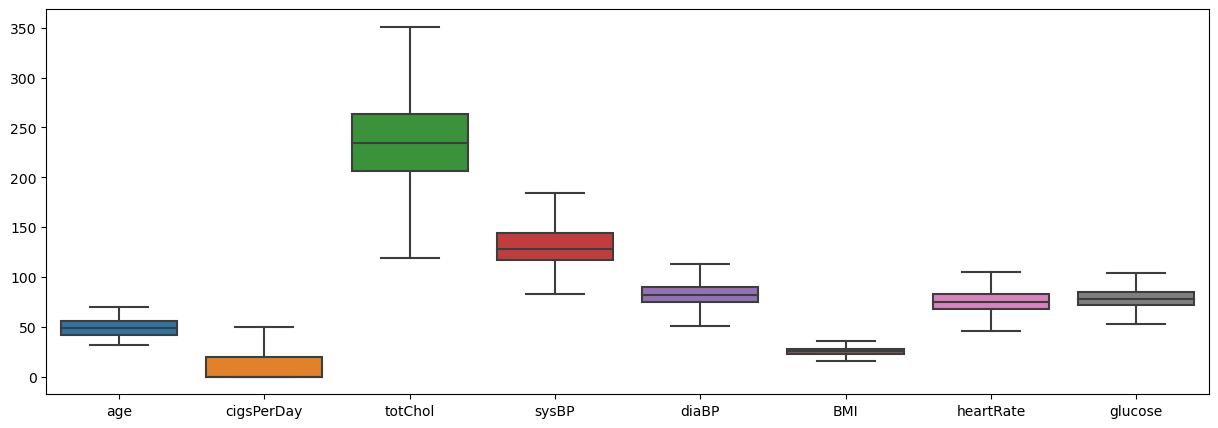

In [29]:
plt.figure(figsize=(15,5))
# boxplot of numerical features
sns.boxplot(data=df[numeric_features])
plt.show()

# 3.Data Visualisation

In [21]:
A_list = ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [22]:
null_list= ['glucose','diabetes','BPMeds','totChol','cigsPerDay','BMI','heartRate']

<Axes: >

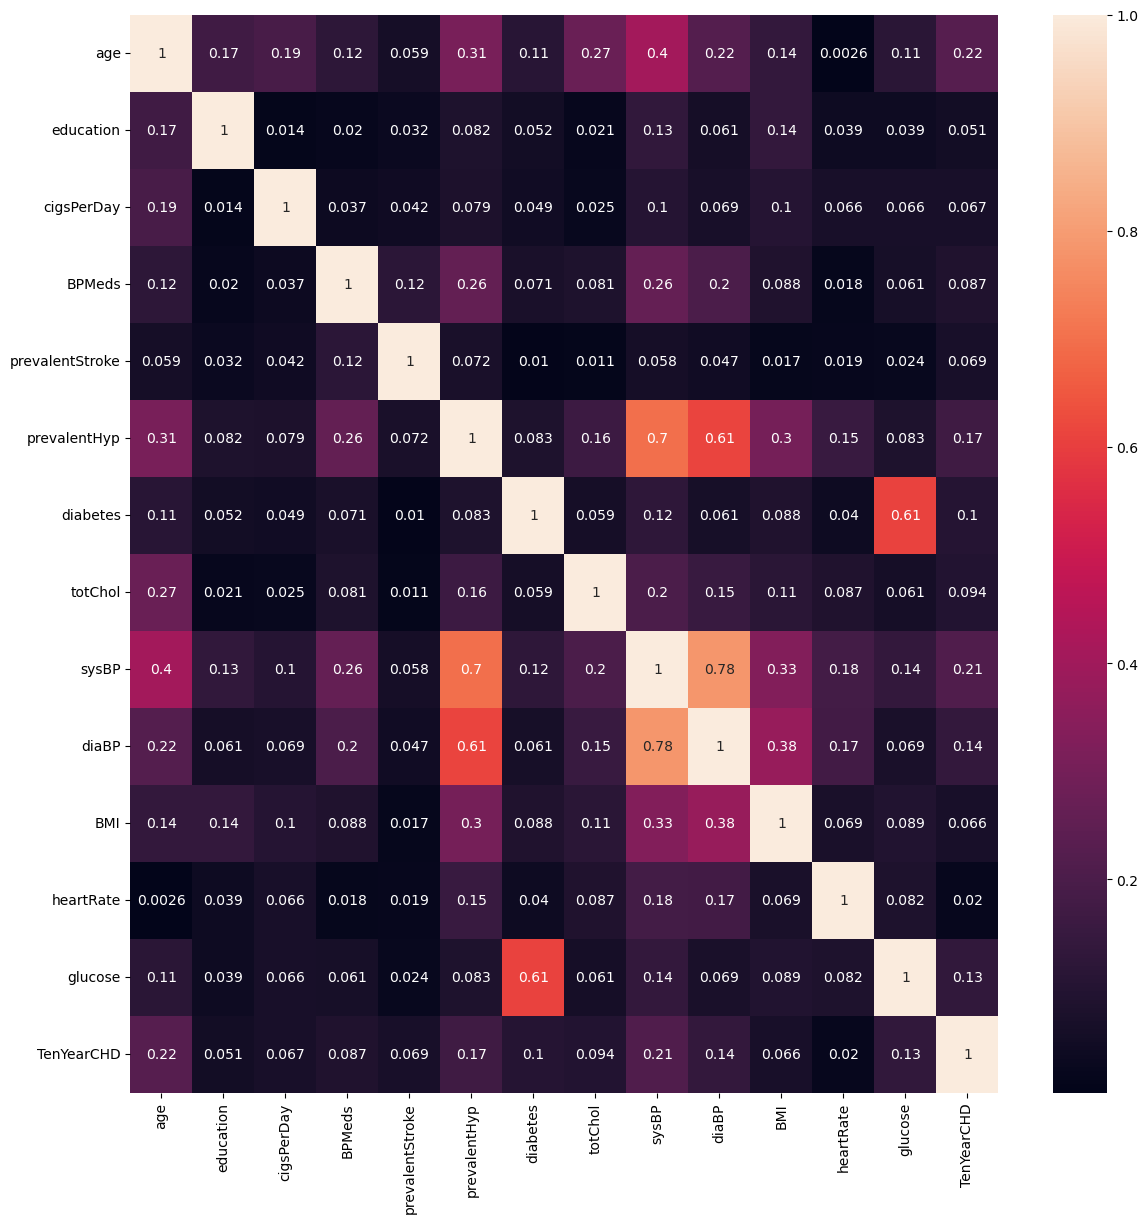

In [23]:
plt.figure(figsize=(14,14))
correlation = df[A_list].corr()
sns.heatmap(abs(correlation), annot=True)

There is no significant correlation between independent and dependant variables but there is a high correlation within independent variables.

In [24]:
numeric_features = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
categorical_features = ['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']

# splitting features into numeric and categoric.
'''
If feature has more than 10 categories we will consider it
as numerical_features, remaining features will be added to categorical_features.
'''


print(f'numeric feature : {numeric_features}')
print(f'category feature : {categorical_features}')

numeric feature : ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
category feature : ['education', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']


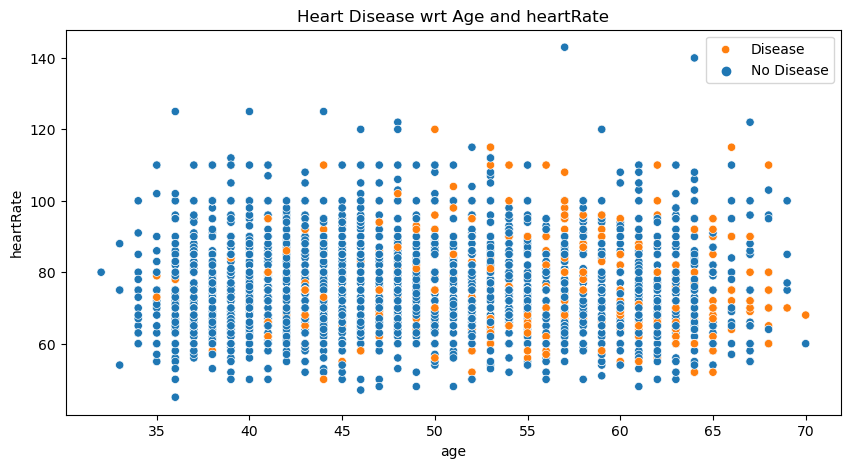

In [25]:
# figsize
plt.figure(figsize=(10,5))
# scatterplot
sns.scatterplot(x='age', y='heartRate', hue='TenYearCHD', data=df)
# title
plt.title('Heart Disease wrt Age and heartRate')
plt.legend(['Disease', 'No Disease'])

### Observation:

This is a multi variate analysis between age, TenYearCHD and heartRate.
There is a clear relation between age and Heart Disease, with the increase in age the chance of heart disease increases. There is no significant relationship between heart disease and heart rate.

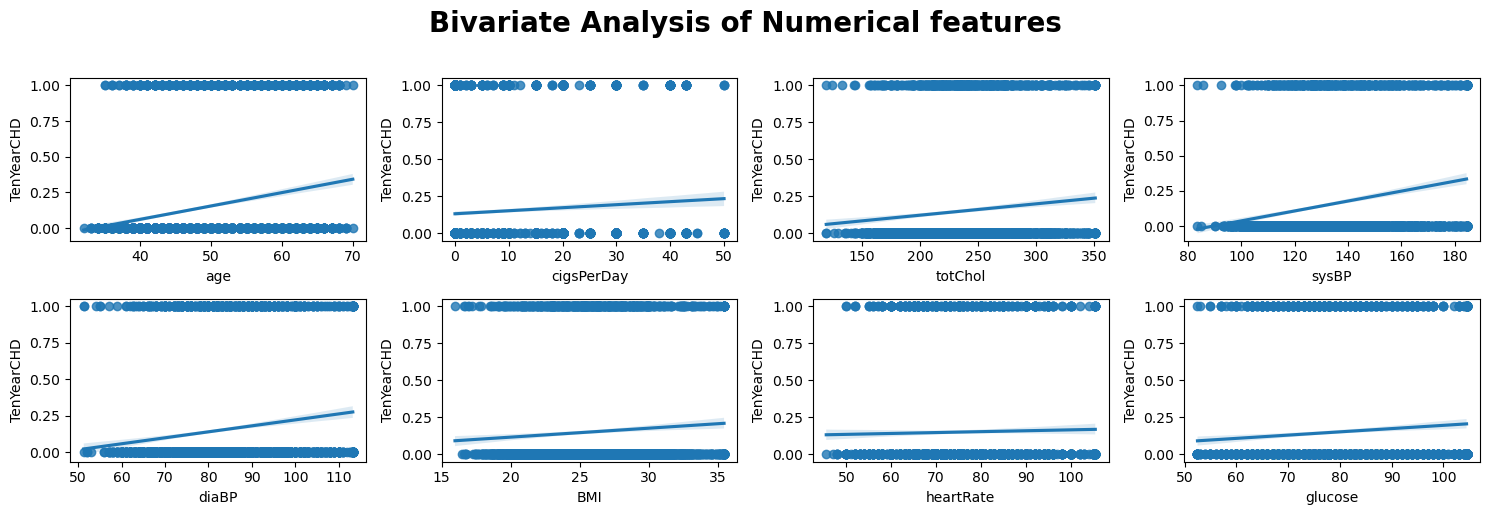

In [30]:
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Numerical features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(numeric_features):
  plt.subplot(2, 4, i+1)                     # subplots of 2 rows and 4 columns

  # regression plots
  sns.regplot(x=df[col], y='TenYearCHD', data=df)
  # x-axis lable
  plt.xlabel(col)
  plt.tight_layout()

### Observation:

Numerous Independent numerical variables are linked to our Target variable and have a positive relationship with our target variable.

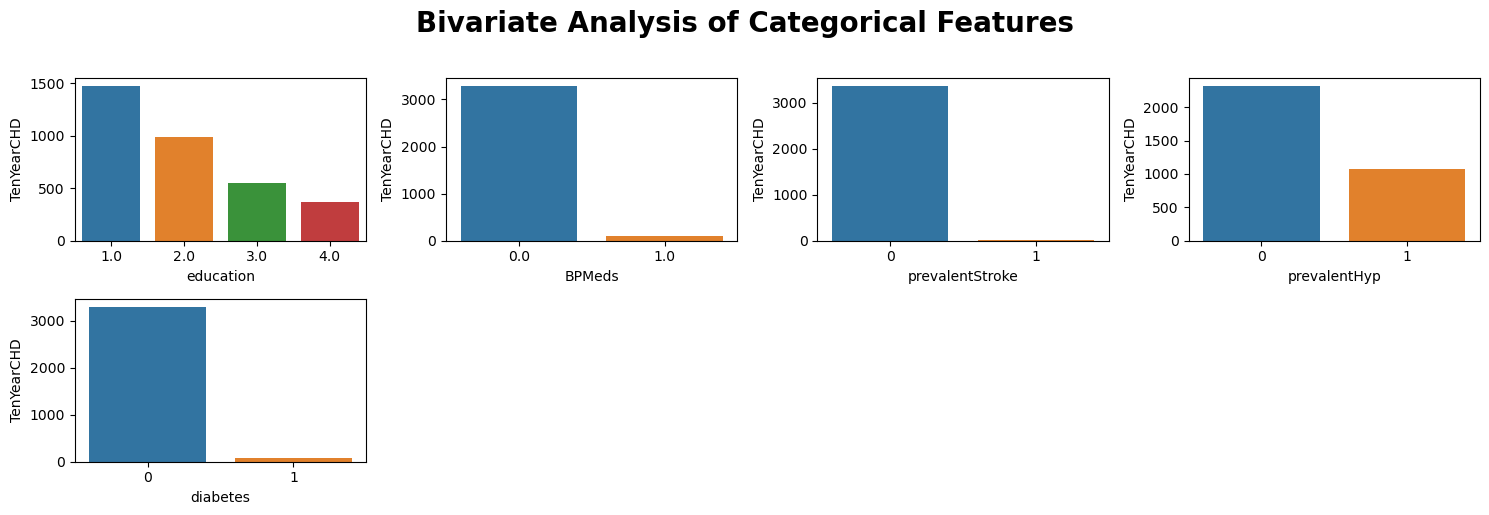

In [31]:
plt.figure(figsize=(15,5))
# title
plt.suptitle('Bivariate Analysis of Categorical Features', fontsize=20, fontweight='bold', y=1.02)

for i,col in enumerate(categorical_features[:-1]):       # taking all features in categoric column except target feature(TenYearCHD) 
  plt.subplot(2, 4, i+1)                                 # subplots of 2 rows and 4 columns
  a = df.groupby(col)[['TenYearCHD']].count().reset_index()

  # barplot
  sns.barplot(x=a[col], y=a['TenYearCHD'])
  # x-axis label
  plt.xlabel(col)
  plt.tight_layout()
     

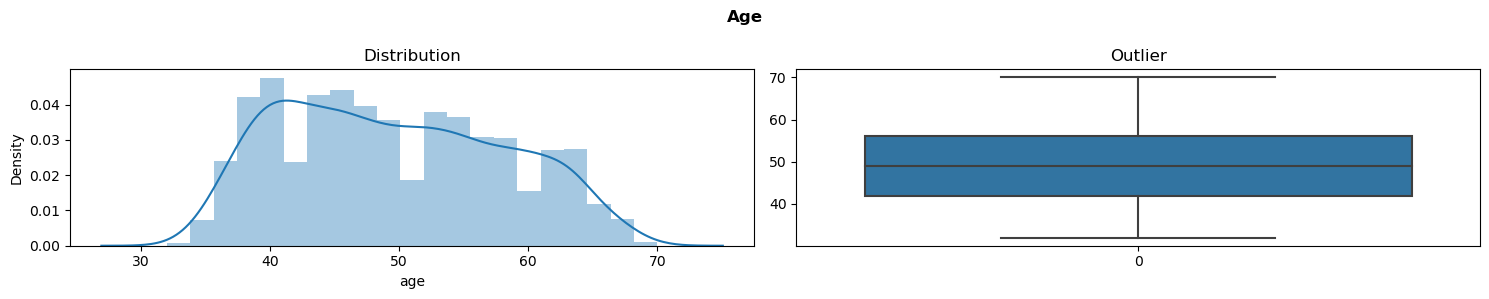

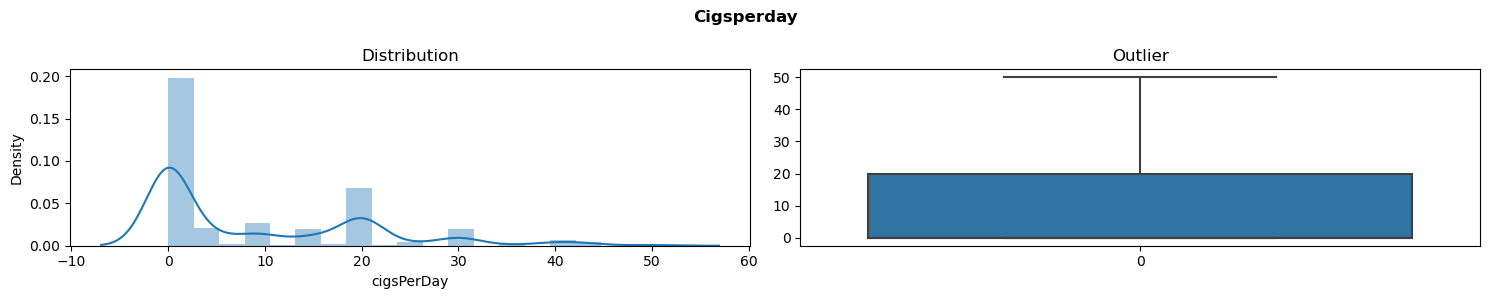

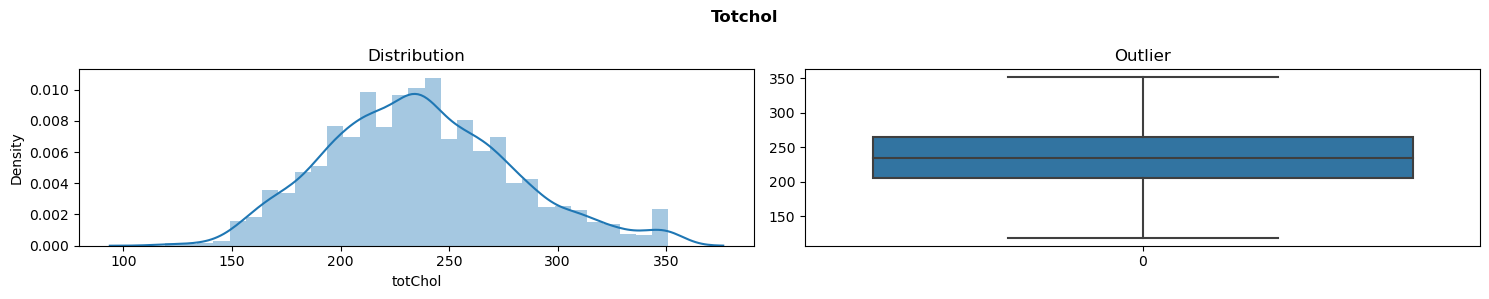

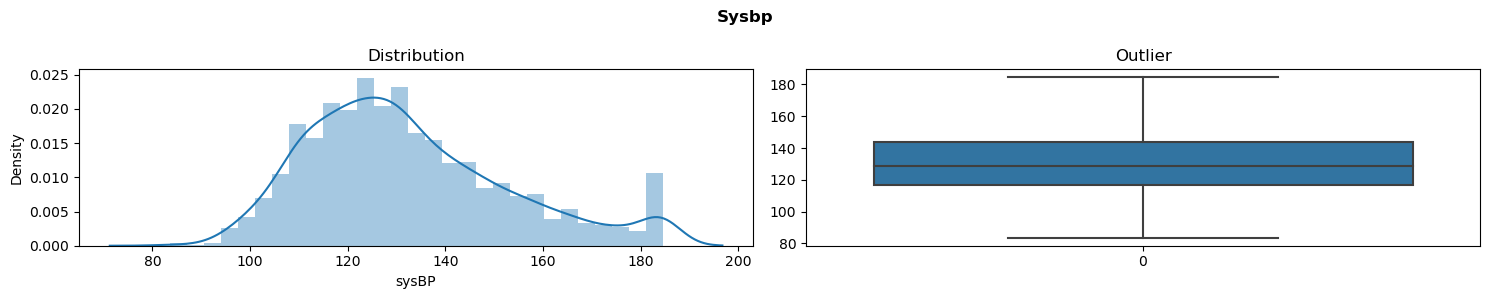

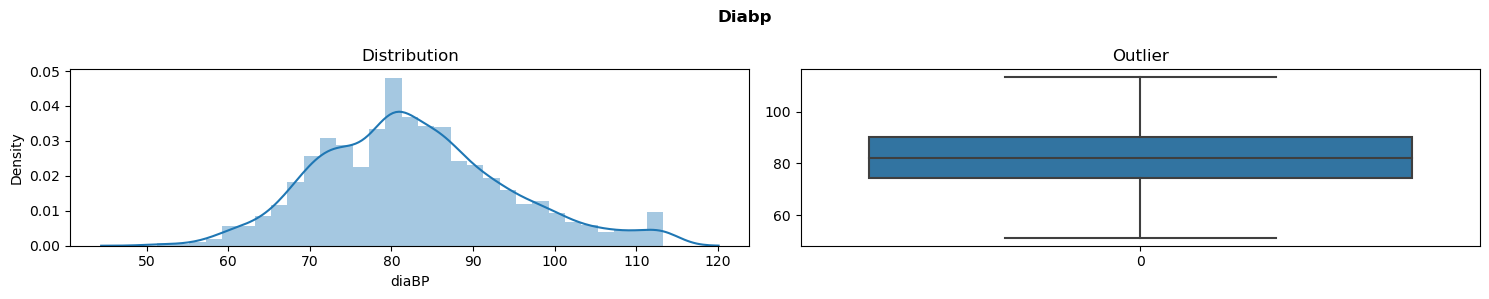

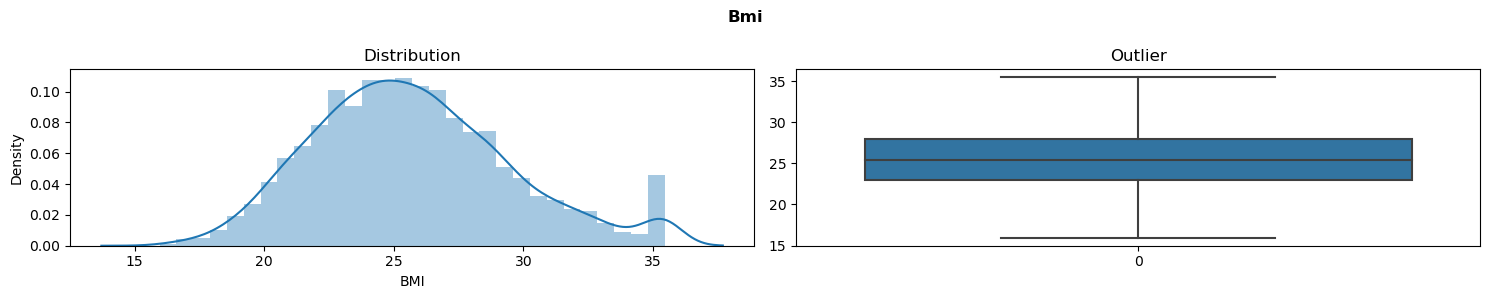

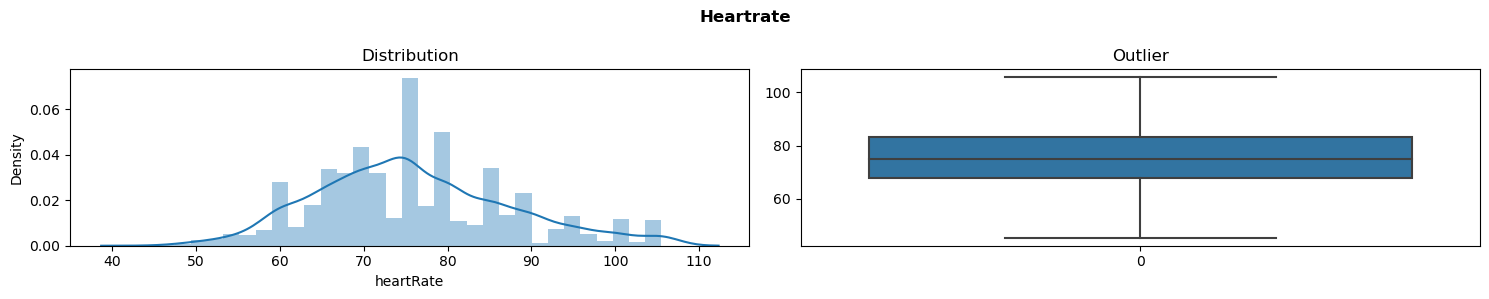

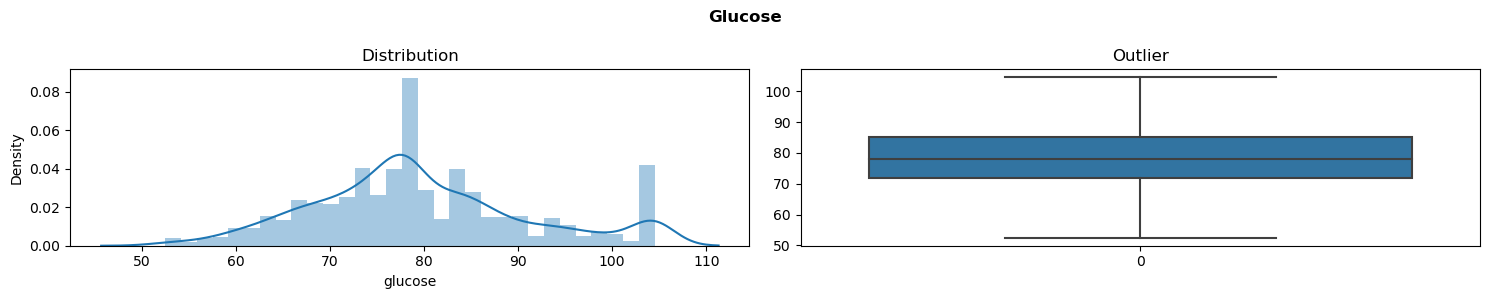

In [32]:
for col in numeric_features:
  fig, ax =plt.subplots(1,2, figsize=(15,3)) 
  sns.distplot(df[col], ax=ax[0]).set(title="Distribution")
  sns.boxplot(df[col], ax=ax[1]).set(title="Outlier")
  plt.suptitle(f'{col.title()}',weight='bold')
  plt.tight_layout()

### Observation:

We can also observe some shifts in the distribution of the data after treating outliers. Some of the data were skewed before handling outliers, but after doing so, the features almost follow the normal distribution. Therefore, we are not utilizing the numerical feature transformation technique.

In [33]:
continuous_var = ['age','cigsPerDay','totChol','sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

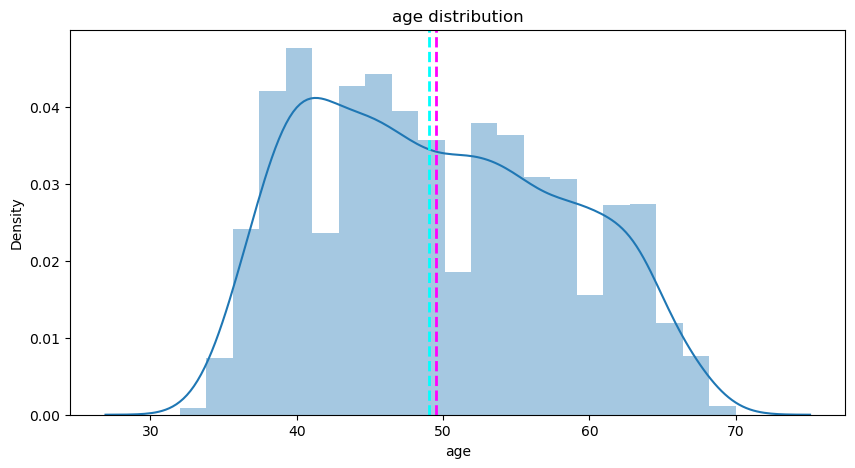

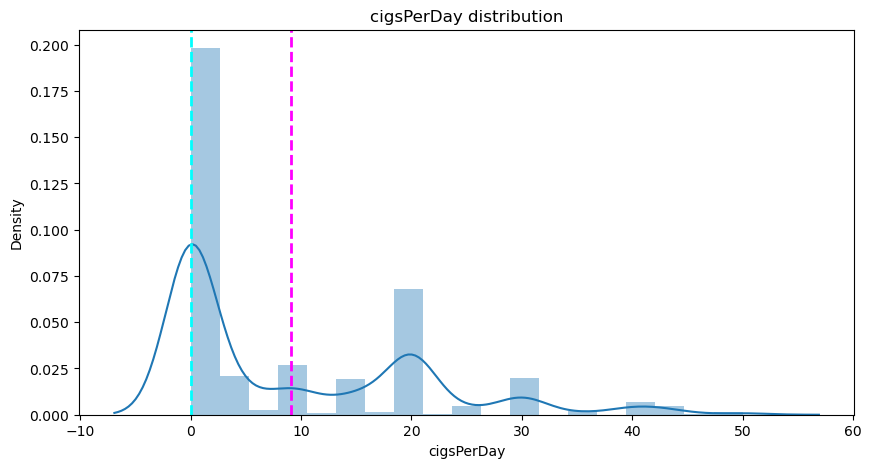

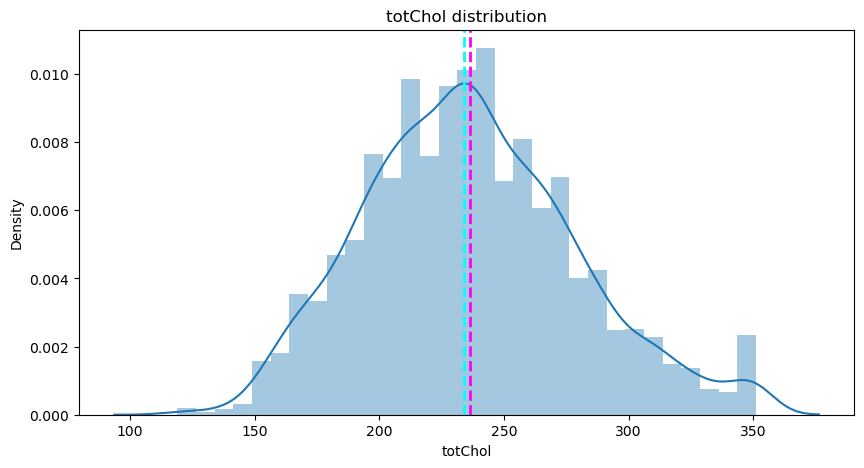

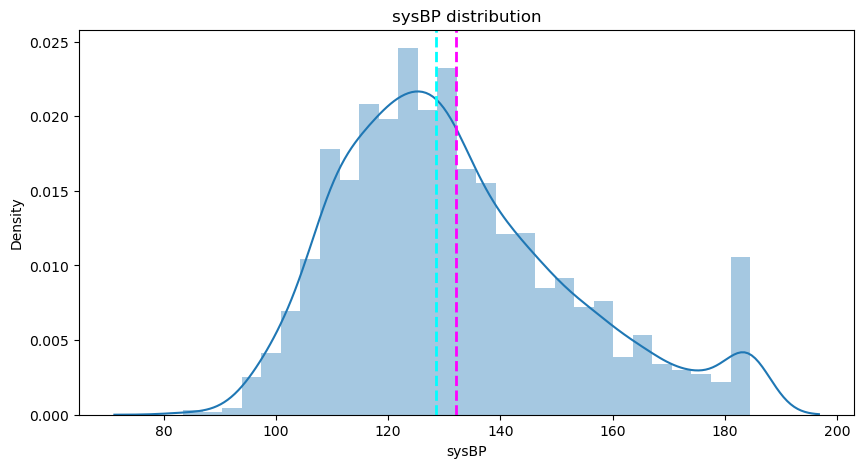

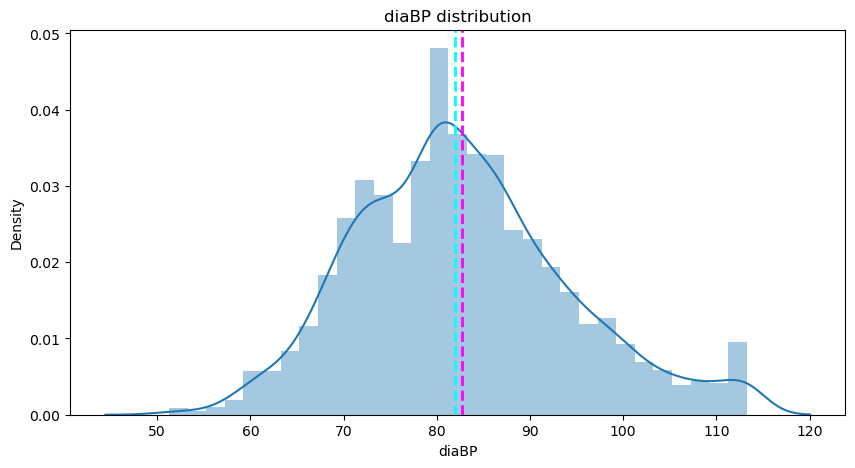

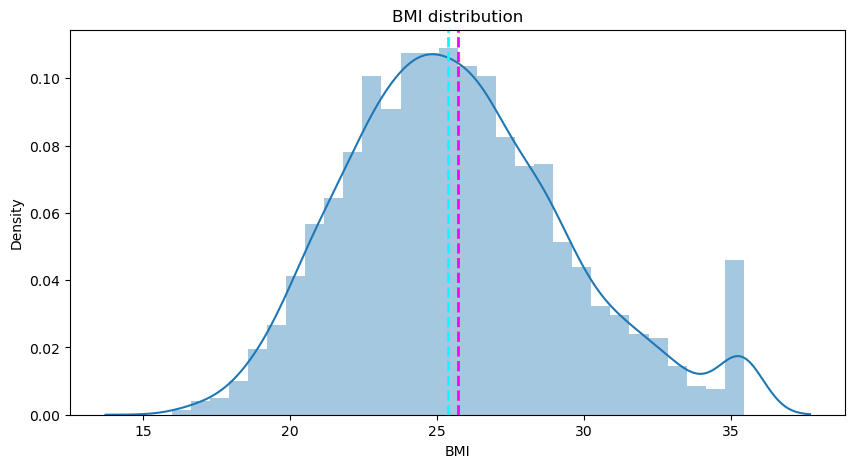

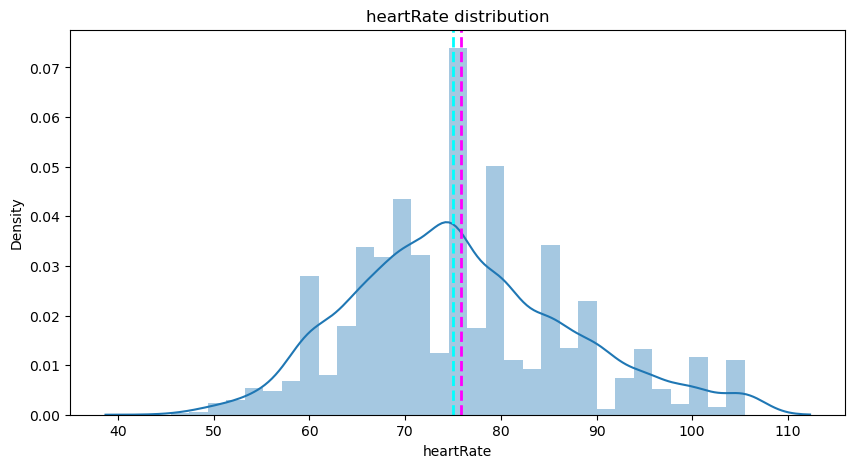

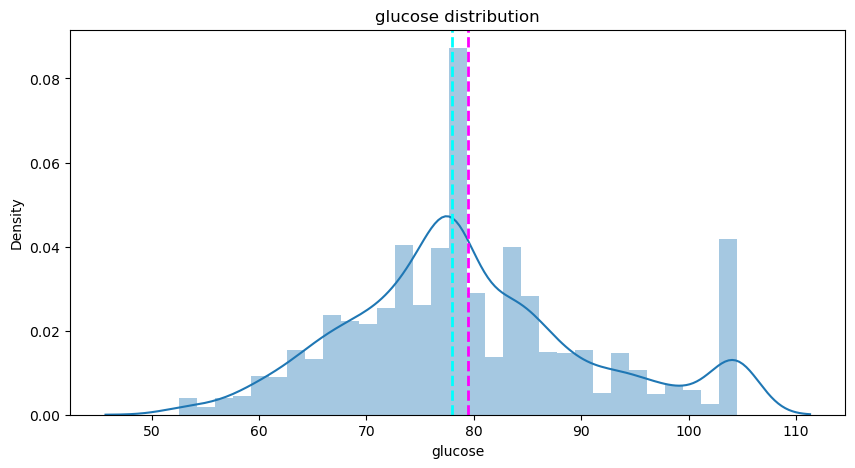

In [34]:
for col in continuous_var:
  plt.figure(figsize=(10,5))
  sns.distplot(df[col])
  plt.axvline(df[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col+' distribution')
  plt.show()

### Observation:

For numerical features, we can see that the majority of distributions are right-skewed. The distributions of totChol (total cholesterol) and BMI are roughly comparable. The distribution of glucose is highly skewed to the right. It demonstrates that glucose has many outliers.

Some of the variables can get a normal distribution when outliers are removed. As a result, it appears that outliers should be removed before the transformation. First, we get rid of outliers, and then we check to see if we need to use the transformation technique again.

Text(0.5, 1.0, 'SysBP and DiaBP distribution')

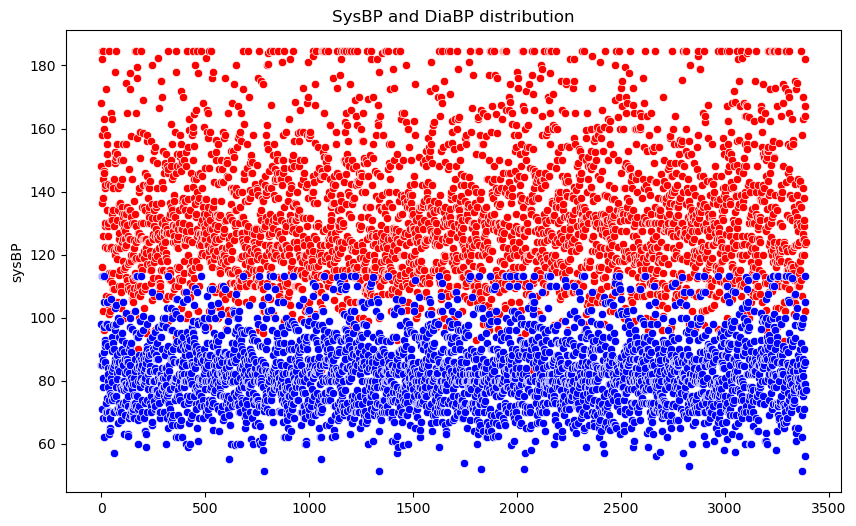

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(df['sysBP'],color='red')
sns.scatterplot(df['diaBP'],color='blue')
plt.title('SysBP and DiaBP distribution')

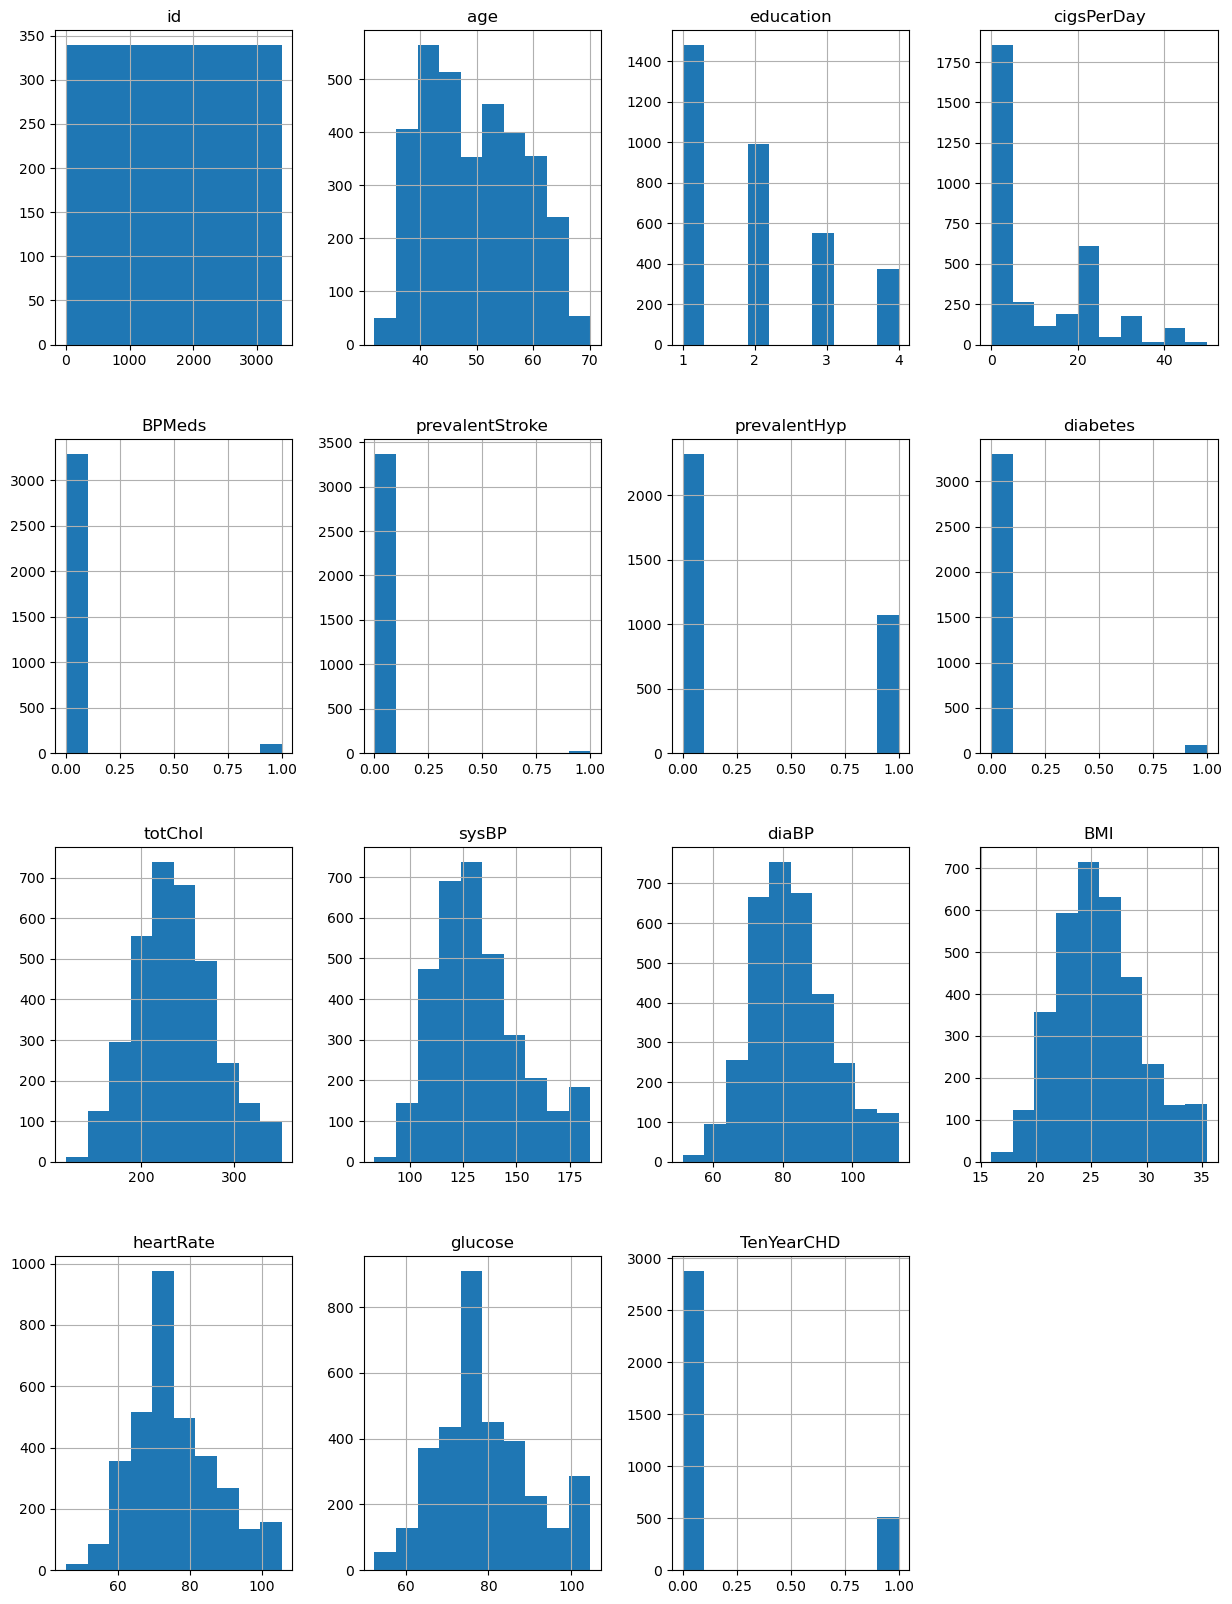

In [36]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

# 7.Feature Selection

In [68]:
# find and remove correlated features

def correlation(dataset, threshold):
    col_corr = set()                                           # Set of all the names of correlated features
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:        # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]               # getting the name of column
                col_corr.add(colname)
    return col_corr

In [70]:
# checking the highly correlated features
correlation(df, 0.7)

{'cigsPerDay', 'diaBP', 'sysBP'}

### 7.1. Feature Manipulation

The readings of blood pressure are shown in two numbers.

1.The highest number in your systolic blood pressure reading.

2.The lowest number on your diastolic blood pressure readings.

Pulse Pressure is the sum of the top number (systolic) and the bottom number (diastolic). For instance, a pulse pressure of 40 is considered to be healthy if the resting blood pressure is 120/80 millimeters of mercury (mm Hg). A pulse pressure greater than 40 mm Hg is typically considered unhealthy.

The risk of a heart event, such as a heart attack or stroke, can be predicted by measuring pulse pressure. High pulse pressure, especially in older people, is considered a risk factor for cardiovascular disease.

In [71]:
# adding new column PulsePressure 
df['pulse_pressure'] = df['sysBP'] - df['diaBP']

# dropping the sysBP and diaBP columns
df.drop(columns=['sysBP', 'diaBP'], inplace=True)

If a person smokes (is_smoking=='yes'), but the number of cigarettes smoked per day is 0, or cigsPerDay is 0. Then it may develop into a conflicting case, we must treat those records.

In [72]:
# checking data, weather the provide information is correct or not
df[(df.is_smoking == 'YES') & (df.cigsPerDay == 0)]

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure


since the is_smoking and cigsPerDay columns do not contain any conflict cases. It is sufficient to provide information regarding is_smoking in the cigsPerDay column.

In [74]:
# droping is_smoking column due to multi-collinearity

df.drop('is_smoking', axis=1, inplace=True)

In [56]:
df['sex'] = np.where(df['sex'] == 'M',1,0)
df['is_smoking'] = np.where(df['is_smoking'] == 'YES',1,0)

In [61]:
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,0,1,3.0,0.0,0,0,0,221.0,148.0,85.0,25.38,90.0,80.0,1
1,1,36,4.0,1,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,0,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,0,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### 7.2. Extra Trees Classifier

Extra_Tree_Classifier is a tree-based strategy that naturally ranks according to how well they decrease the Gini impurity (the purity of the node) across all trees. Notes with the least amount of impurity are found at the ends of trees, while nodes at the beginning of trees have the greatest decrease in impurity. As a result, we can select a subset of the most important features by pruning trees below a particular node.

In [76]:
X = df.drop('TenYearCHD', axis=1)
y= df['TenYearCHD']

In [77]:
# importing libarary
from sklearn.ensemble import ExtraTreesClassifier

# model fitting 
model = ExtraTreesClassifier()
model.fit(X,y)

# ranking feature based on importance
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
print(ranked_features.sort_values(ascending=False))

age                0.131780
pulse_pressure     0.121991
BMI                0.112580
totChol            0.112551
id                 0.107976
glucose            0.106862
heartRate          0.103821
cigsPerDay         0.074244
education          0.052211
prevalentHyp       0.025274
sex                0.022241
diabetes           0.011893
BPMeds             0.009712
prevalentStroke    0.006865
dtype: float64


### 7.3. Chi-square Test

In feature selection, the chi-square test can be used to determine if a variable is related to target variable. If the p-value of the test is low, it indicates that there is a significant relationship between the two variables, and the variable can be selected as an important feature for the model.

In [78]:
# importing libarary
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# model fitting
ordered_rank_features = SelectKBest(score_func=chi2, k='all')
model = ordered_rank_features.fit(X,y)

# ranking feature based on importance
feature_imp = pd.Series(model.scores_,index=X.columns)
feature_imp.sort_values(ascending=False)

pulse_pressure     504.562956
age                255.538687
cigsPerDay         231.327665
totChol            221.707805
id                 186.486087
prevalentHyp        64.377708
diabetes            35.506306
glucose             28.487377
BPMeds              25.102438
prevalentStroke     15.861998
sex                 13.778390
BMI                  7.945880
education            4.761842
heartRate            2.315308
dtype: float64

### 7.4. Information Gain

Information gain is used in decision trees to select the attribute with the highest information gain as the root node or the top level of the tree. Information gain measures the difference between the entropy of the original dataset and the entropy of the subsets created by splitting the data on an attribute.

In [79]:
# importing libarary
from sklearn.feature_selection import mutual_info_classif

# model fitting
mutual_info = mutual_info_classif(X,y)

# ranking feature based on importance. 
mutual_data = pd.Series(mutual_info, index=X.columns)
mutual_data.sort_values(ascending=False)

age                0.022362
pulse_pressure     0.014907
sex                0.009481
totChol            0.009043
prevalentHyp       0.009005
BMI                0.008534
glucose            0.007802
prevalentStroke    0.004957
diabetes           0.004471
education          0.003749
BPMeds             0.002785
id                 0.000000
cigsPerDay         0.000000
heartRate          0.000000
dtype: float64

### 7.5. Feature Importance

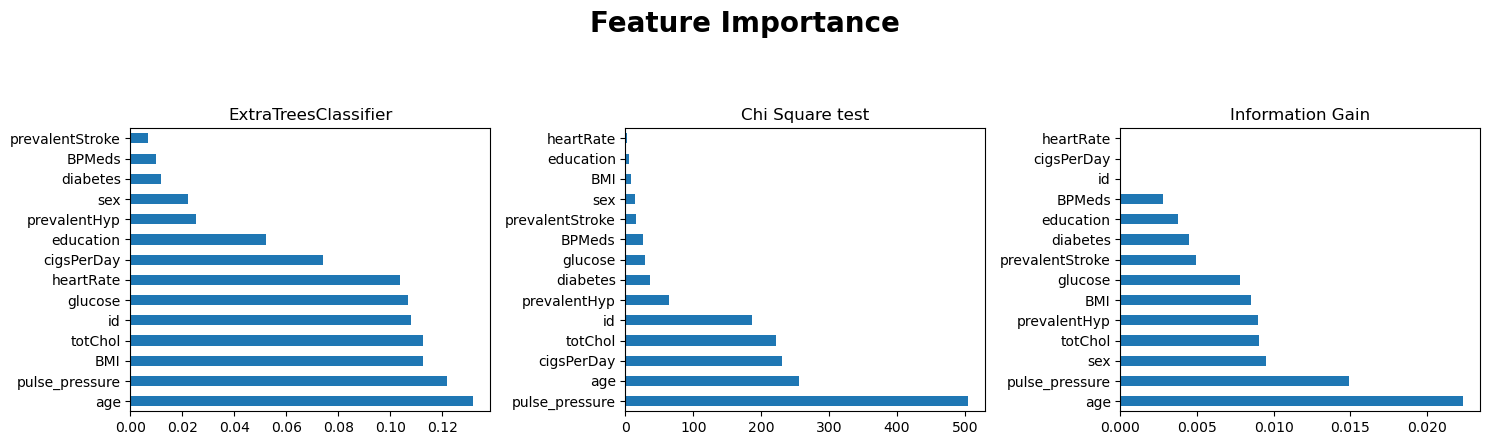

In [80]:
# plotting graph ---> Feature Importance
fig, axs = plt.subplots(1,3, figsize=(15,4))

ranked_features.sort_values(ascending=False).plot(kind='barh', title='ExtraTreesClassifier', ax=axs[0])
feature_imp.sort_values(ascending=False).plot(kind='barh', title='Chi Square test', ax=axs[1])
mutual_data.sort_values(ascending=False).plot(kind='barh', title='Information Gain', ax=axs[2])

plt.suptitle('Feature Importance', fontsize=20, fontweight='bold', y=1.1)
plt.tight_layout()

#### From these graphs, we can say that the two most important features are 'age and 'pulse_pressure' to predict the target variable.

<Axes: >

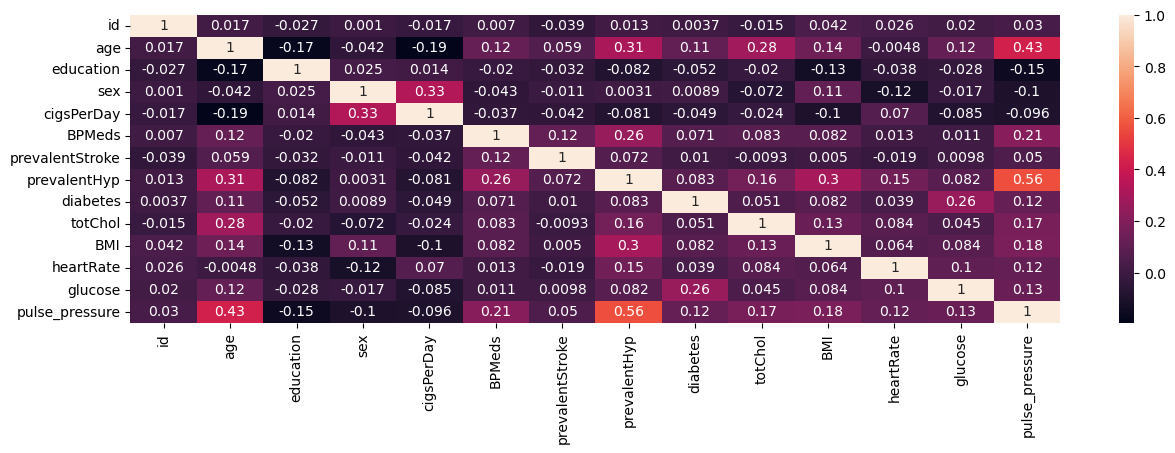

In [82]:
# plotting correlation heatmap to check multicollinearity.
plt.figure(figsize=(15,4))
sns.heatmap(df.drop(columns='TenYearCHD').corr(),annot=True)

In [84]:
correlation(df, 0.7)

set()

Within the independent variables, there is no high multicollinearity.

### 7.6. Dependent and Independent Variable Assignment

In [86]:
# copying the data to save the work done till now
model_df = df.copy()
model_df.head(3)

,id,age,education,sex,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,BMI,heartRate,glucose,TenYearCHD,pulse_pressure
0,0,64,2.0,0,3.0,0.0,0,0,0,221.0,25.38,90.0,80.0,1,63.0
1,1,36,4.0,1,0.0,0.0,0,1,0,212.0,29.77,72.0,75.0,0,70.0
2,2,46,1.0,0,10.0,0.0,0,0,0,250.0,20.35,88.0,94.0,0,45.0


In [87]:
X = model_df.drop(columns='TenYearCHD')     # independent features
y = model_df['TenYearCHD']                  # dependent features

### 7.7. Handling Imbalance Target Variable 

0    2879
1     511
Name: TenYearCHD, dtype: int64
 


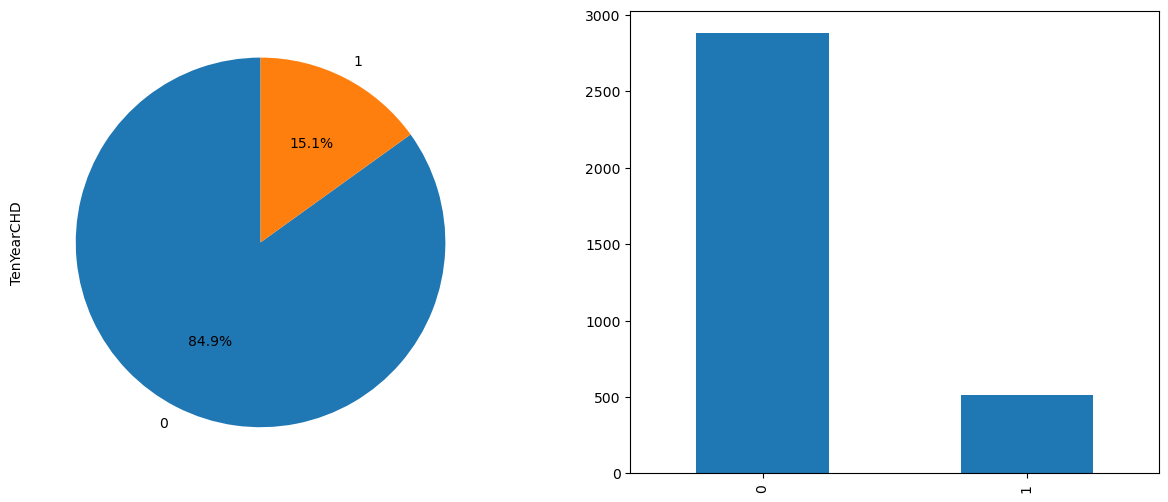

In [88]:
# Dependant Column Value Counts
print(model_df.TenYearCHD.value_counts())
print(" ")

# Dependant Variable Column Visualization
fig,ax = plt.subplots(1,2, figsize=(15,6))

# pie chart for percentage
model_df['TenYearCHD'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=90, ax=ax[0])

# bar chart for count
model_df['TenYearCHD'].value_counts().plot(kind='bar', ax=ax[1])
plt.show()

When there are significantly more instances of certain classes than others, the issue of class imbalance typically arises. Class imbalance in the target class is a problem for machine learning models because it can result in biased predictions. That is why we need to balance the target class.

#### The data set differs significantly. Our data, therefore, lack balance. We will use the Synthetic Minority Oversampling Technique (SMOTE) to resolve this issue.

SMOTE (Synthetic Minority Oversampling Technique) works by randomly selecting a minority class point and calculating its k-nearest neighbors. Between the selected point and its neighbors, the synthetic points are added. Continue with the steps until the data is balanced.

In [89]:
## Handling target class imbalance using SMOTE
from collections import Counter
from imblearn.over_sampling import SMOTE

print(f'Before Handling Imbalanced class {Counter(y)}')

# Resampling the minority class
smote = SMOTE(random_state=42)
# fit predictor and target variable
X, y = smote.fit_resample(X, y)

print(f'After Handling Imbalanced class {Counter(y)}')

Before Handling Imbalanced class Counter({0: 2879, 1: 511})
After Handling Imbalanced class Counter({1: 2879, 0: 2879})


We have successfully balanced the target variable.

# 8. Model Building 

### 8.1 Train Test Split

In [90]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

print(X_train.shape)
print(X_test.shape)

(4606, 14)
(1152, 14)


### 8.2 Scaling Data

In [91]:
# Scaling Data
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 8.3 Model Training

In [94]:
# empty list for appending performance metric score 
model_result = []

def predict(ml_model, model_name):
  
  '''
  Pass the model and predict value. 
  Function will calculate all the eveluation metrics and appending those metrics score on model_result table.
  Plotting confusion_matrix and roc_curve for test data.
  ''' 
  
  # model fitting
  model = ml_model.fit(X_train, y_train)
  
  # predicting value and probability
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)
  y_train_prob = model.predict_proba(X_train)[:,1]
  y_test_prob = model.predict_proba(X_test)[:,1]


  ''' Performance Metrics ''' 
  # accuracy score  ---->  (TP+TN)/(TP+FP+TN+FN)
  train_accuracy = accuracy_score(y_train, y_train_pred) 
  test_accuracy = accuracy_score(y_test, y_test_pred)
  print(f'train accuracy : {round(train_accuracy,3)}')
  print(f'test accuracy : {round(test_accuracy,3)}')

  # precision score  ---->  TP/(TP+FP)
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test, y_test_pred)
  print(f'train precision : {round(train_precision,3)}')
  print(f'test precision : {round(test_precision,3)}')

  # recall score  ---->  TP/(TP+FN)
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test, y_test_pred)
  print(f'train recall : {round(train_recall,3)}')
  print(f'test recall : {round(test_recall,3)}')
  
  # f1 score  ---->  Harmonic Mean of Precision and Recall
  train_f1 = f1_score(y_train, y_train_pred)
  test_f1 = f1_score(y_test, y_test_pred)
  print(f'train f1 : {round(train_f1,3)}')
  print(f'test f1 : {round(test_f1,3)}')
  
  # roc_auc score  ---->  It shows how well the model can differentiate between classes.
  train_roc_auc = roc_auc_score(y_train, y_train_prob)
  test_roc_auc = roc_auc_score(y_test, y_test_prob)
  print(f'train roc_auc : {round(train_roc_auc,3)}')
  print(f'test roc_auc : {round(test_roc_auc,3)}')
  print('-'*80)

  # classification report
  print(f'classification report for test data \n{classification_report(y_test, y_test_pred)}')
  print('-'*80)


  ''' plotting Confusion Matrix '''
  ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
  plt.title('confusion matrix on Test data', weight='bold')
  plt.show()
  print('-'*80)
  
  
  ''' plotting ROC curve '''
  fpr, tpr, threshold = roc_curve(y_test, y_test_prob)
  plt.plot(fpr,tpr, label=f'ROC - {model_name}')
  plt.plot([0,1], [0,1], '--')
  plt.title('ROC curve on Test data', weight='bold')
  plt.xlabel('False Positive Rate----->')
  plt.ylabel('True Positive Rate----->')
  plt.legend(loc=4)


  ''' actual value vs predicted value on test data'''
  d = {'y_actual':y_test, 'y_predict':y_test_pred}
  print(pd.DataFrame(data=d).head(10).T)                   # constructing a dataframe with both actual and predicted values
  print('-'*80)


  # using the score from the performance metrics to create the final model_result.
  model_result.append({'model':model_name,
                       'train_accuracy':train_accuracy, 
                       'test_accuracy':test_accuracy, 
                       'train_precision':train_precision,
                       'test_precision':test_precision,
                       'train_recall':train_recall,
                       'test_recall':test_recall,
                       'train_f1':train_f1,
                       'test_f1':test_f1,
                       'train_roc_auc':train_roc_auc,
                       'test_roc_auc':test_roc_auc})

# 9. Model Implementation

### 9.1 Logistic Regression

train accuracy : 0.678
test accuracy : 0.675
train precision : 0.676
test precision : 0.684
train recall : 0.69
test recall : 0.631
train f1 : 0.683
test f1 : 0.656
train roc_auc : 0.746
test roc_auc : 0.75
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.67      0.72      0.69       586
           1       0.68      0.63      0.66       566

    accuracy                           0.68      1152
   macro avg       0.68      0.67      0.67      1152
weighted avg       0.68      0.68      0.67      1152

--------------------------------------------------------------------------------


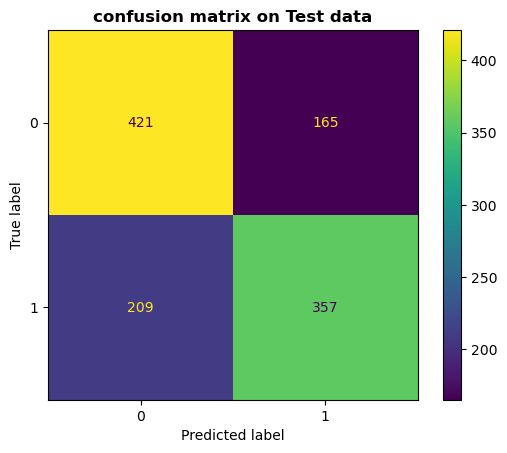

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     0     1     1     1     1     0     1     0     1     0
--------------------------------------------------------------------------------


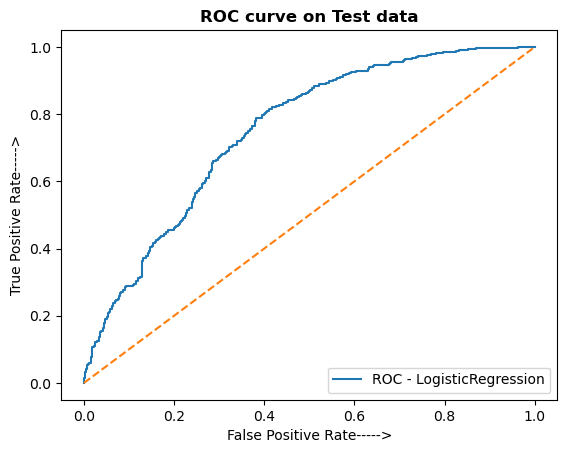

In [97]:
predict(LogisticRegression(), 'LogisticRegression')

### 9.2 SVM (Support Vector Machine) 

train accuracy : 0.796
test accuracy : 0.75
train precision : 0.789
test precision : 0.733
train recall : 0.81
test recall : 0.772
train f1 : 0.799
test f1 : 0.752
train roc_auc : 0.873
test roc_auc : 0.836
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.77      0.73      0.75       586
           1       0.73      0.77      0.75       566

    accuracy                           0.75      1152
   macro avg       0.75      0.75      0.75      1152
weighted avg       0.75      0.75      0.75      1152

--------------------------------------------------------------------------------


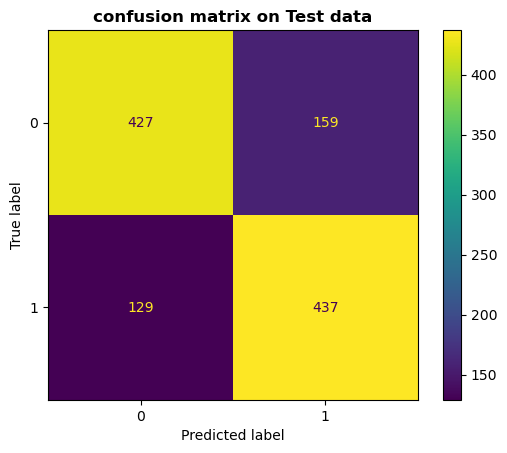

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     0     1     1     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


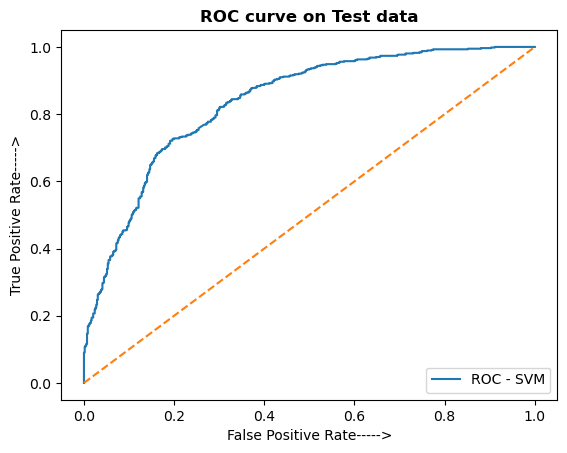

In [98]:
predict(SVC(probability=True), 'SVM')

### 9.3 KNN (K-Nearest Neighbours)

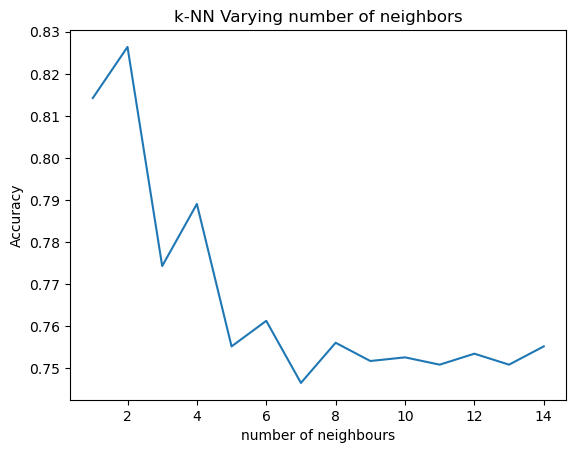

In [99]:
# Checking the optimum value of the k:
accuracy=[]

# Iteratig for the optimum values of k
for i in range(1,15):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train,y_train)
  accuracy.append(knn.score(X_test, y_test))

#plotting the k-value vs accuracy
plt.title('k-NN Varying number of neighbors')
plt.plot(range(1,15), accuracy)
plt.xlabel('number of neighbours')
plt.ylabel('Accuracy')
plt.show()

train accuracy : 1.0
test accuracy : 0.814
train precision : 1.0
test precision : 0.749
train recall : 1.0
test recall : 0.936
train f1 : 1.0
test f1 : 0.832
train roc_auc : 1.0
test roc_auc : 0.816
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.92      0.70      0.79       586
           1       0.75      0.94      0.83       566

    accuracy                           0.81      1152
   macro avg       0.83      0.82      0.81      1152
weighted avg       0.84      0.81      0.81      1152

--------------------------------------------------------------------------------


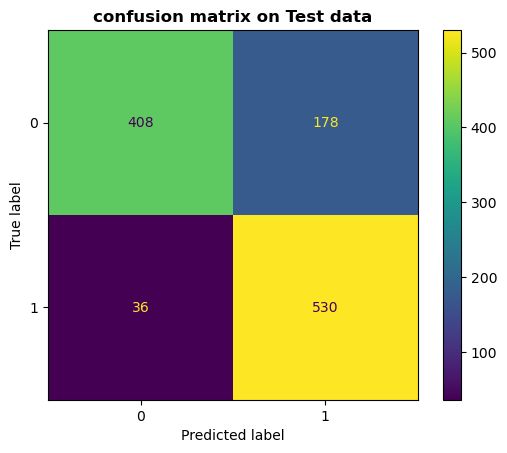

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     1     0     1     1     1     1     1     1     1     0
--------------------------------------------------------------------------------


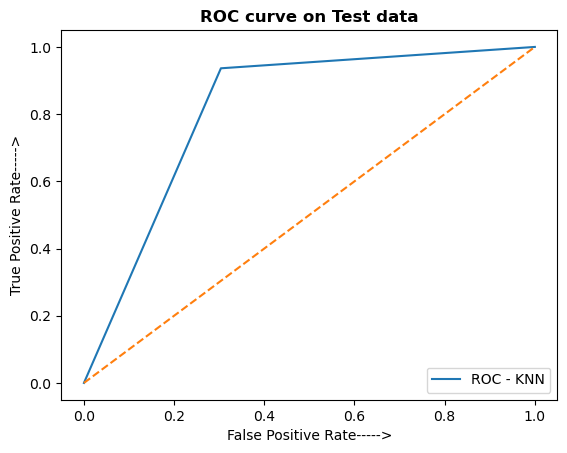

In [100]:
predict(KNeighborsClassifier(n_neighbors=1), 'KNN')

### 9.4 Decision Tree

train accuracy : 1.0
test accuracy : 0.773
train precision : 1.0
test precision : 0.752
train recall : 1.0
test recall : 0.8
train f1 : 1.0
test f1 : 0.776
train roc_auc : 1.0
test roc_auc : 0.773
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       586
           1       0.75      0.80      0.78       566

    accuracy                           0.77      1152
   macro avg       0.77      0.77      0.77      1152
weighted avg       0.77      0.77      0.77      1152

--------------------------------------------------------------------------------


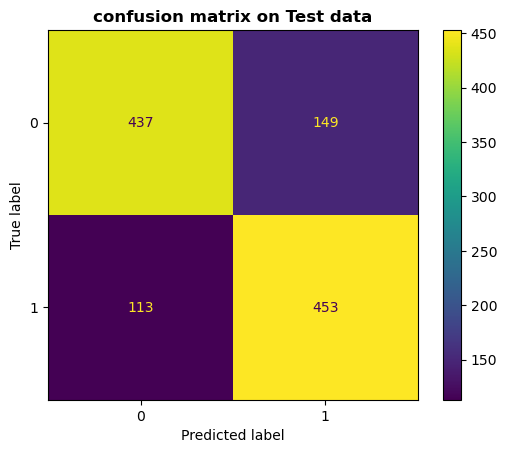

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     0     0     0     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


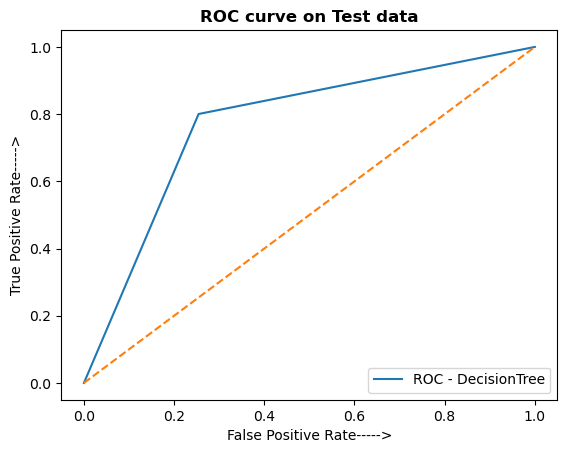

In [101]:
predict(DecisionTreeClassifier(), 'DecisionTree')

### 9.5 Random Forest

#### Hyperparameter Tunning using RandomizedSearchCV

In [102]:
rf_params = {'n_estimators': [500,600,800],     # number of trees in the ensemble
             'max_features': ["log2", "sqrt"],  # maximum number of features considered when splitting a node.
             'max_depth': [35,40,45,50],        # maximum number of levels allowed in each tree.
             'min_samples_split': [7,9,12],     # minimum number of samples necessary in a node to cause node splitting.
             'min_samples_leaf': [4,7,10]}      # minimum number of samples which can be stored in a tree leaf.



# performing Hyperparameter Tunning using RandomizedSearchCV
rf = RandomForestClassifier()
rf_randomsearch = RandomizedSearchCV(estimator=rf, param_distributions=rf_params, n_iter=15, cv=5, verbose=2, n_jobs=-1)

# model fitting 
rf_randomsearch.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=15,
                   n_jobs=-1,
                   param_distributions={'max_depth': [35, 40, 45, 50],
                                        'max_features': ['log2', 'sqrt'],
                                        'min_samples_leaf': [4, 7, 10],
                                        'min_samples_split': [7, 9, 12],
                                        'n_estimators': [500, 600, 800]},
                   verbose=2)

In [103]:
optimal_model = rf_randomsearch.best_estimator_
optimal_model

RandomForestClassifier(max_depth=35, max_features='log2', min_samples_leaf=4,
                       min_samples_split=9, n_estimators=800)

train accuracy : 0.966
test accuracy : 0.863
train precision : 0.982
test precision : 0.876
train recall : 0.949
test recall : 0.839
train f1 : 0.965
test f1 : 0.857
train roc_auc : 0.996
test roc_auc : 0.937
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       586
           1       0.88      0.84      0.86       566

    accuracy                           0.86      1152
   macro avg       0.86      0.86      0.86      1152
weighted avg       0.86      0.86      0.86      1152

--------------------------------------------------------------------------------


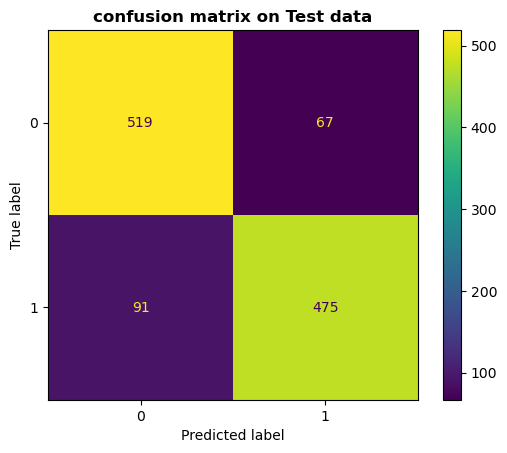

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     0     1     0     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


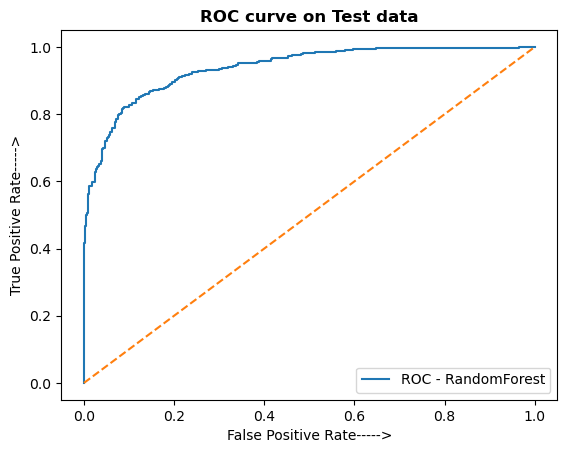

In [104]:
predict(optimal_model, 'RandomForest')

In [105]:
# importance feature
importances = optimal_model.feature_importances_

#Creating a dictonary 
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
2,education,0.154622
1,age,0.145179
13,pulse_pressure,0.134651
4,cigsPerDay,0.128563
10,BMI,0.081463
9,totChol,0.080636
0,id,0.075164
11,heartRate,0.075104
12,glucose,0.073521
5,BPMeds,0.023062


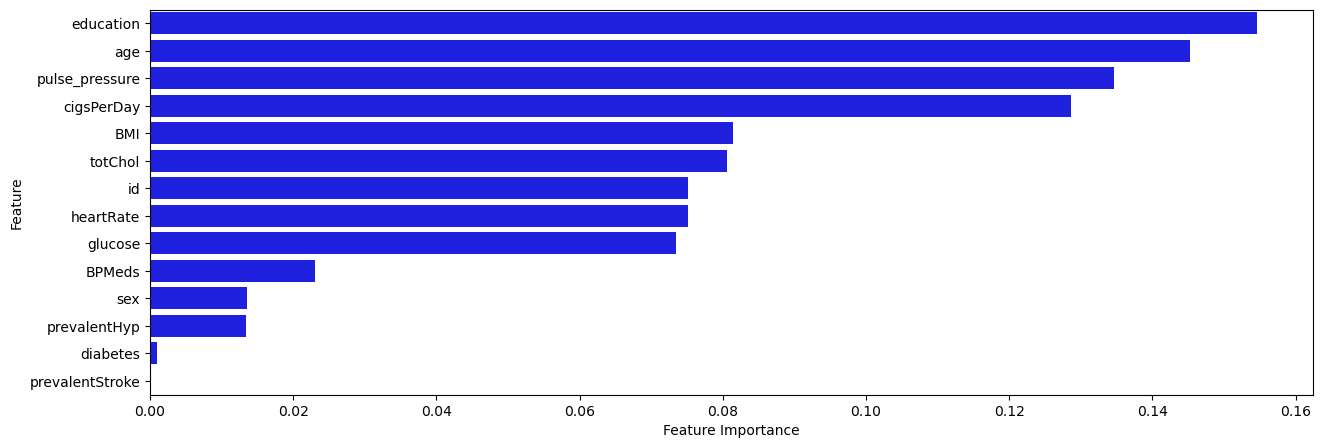

[CV] END max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=500; total time=   2.4s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=500; total time=   2.3s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=4, min_samples_split=9, n_estimators=500; total time=   2.4s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=800; total time=   3.6s
[CV] END max_depth=45, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=800; total time=   3.6s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=800; total time=   3.6s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=800; total time=   3.5s
[CV] END max_depth=35, max_features=log2, min_samples_leaf=7, min_samples_split=12, n_estimators=800; total time=   3.6s
[CV] END max_depth=45, max_features

In [106]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

### 9.6 AdaBoost

train accuracy : 0.822
test accuracy : 0.818
train precision : 0.842
test precision : 0.831
train recall : 0.794
test recall : 0.79
train f1 : 0.817
test f1 : 0.81
train roc_auc : 0.901
test roc_auc : 0.903
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       586
           1       0.83      0.79      0.81       566

    accuracy                           0.82      1152
   macro avg       0.82      0.82      0.82      1152
weighted avg       0.82      0.82      0.82      1152

--------------------------------------------------------------------------------


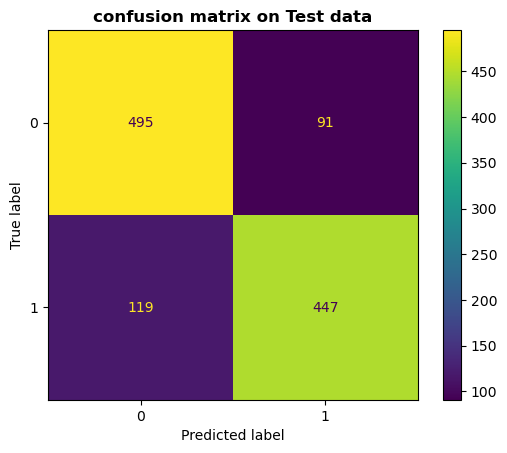

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     0     1     0     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


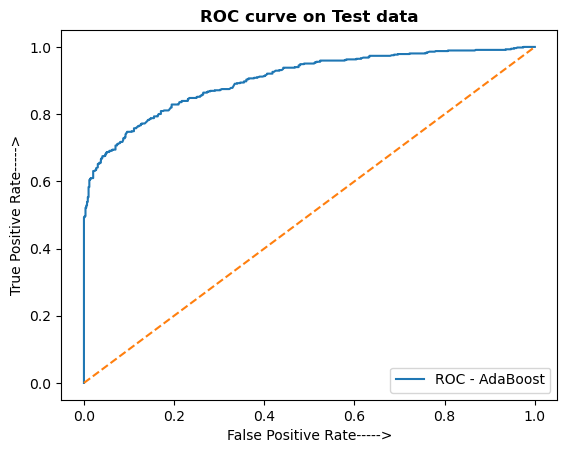

In [107]:
predict(AdaBoostClassifier(), 'AdaBoost')

### 9.7 XGBoost

#### HyperParameter Tunning using GridSearchCV

In [109]:
xgb_params = {'n_estimators': [1000],    # number of trees in the ensemble
          'max_depth': [6,9],            # maximum number of levels allowed in each tree.
          'min_samples_split': [5,7],    # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [6,8],     # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}         # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
xgb = XGBClassifier()
xgb_gridsearch = GridSearchCV(estimator=xgb, param_grid=xgb_params, cv=5, n_jobs=-1, verbose=2)

# model fitting
xgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[16:06:57] WARNING: /opt/conda/conda-bld/xgboost-ext_1694783357525/work/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END learning_rate=0.1, max_depth=9, min_samples_leaf=6, min_samples_split=7, n_estimators=1000; total time=  11.9s
[16:07:09] WARNING: /opt/conda/conda-bld/xgboost-ext_1694783357525/work/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly her

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [6, 9],
                         'min_samples_leaf': [6, 8],
                         'min_samples_split': [5, 7], 'n_estimators': [1000]},
             verbose=2)

In [110]:
optimal_model = xgb_gridsearch.best_estimator_
optimal_model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=9, max_leaves=0, min_child_weight=1,
              min_samples_leaf=6, min_samples_split=5, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

[16:12:21] WARNING: /opt/conda/conda-bld/xgboost-ext_1694783357525/work/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


train accuracy : 1.0
test accuracy : 0.915
train precision : 1.0
test precision : 0.94
train recall : 1.0
test recall : 0.883
train f1 : 1.0
test f1 : 0.911
train roc_auc : 1.0
test roc_auc : 0.959
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       586
           1       0.94      0.88      0.91       566

    accuracy                           0.91      1152
   macro avg       0.92      

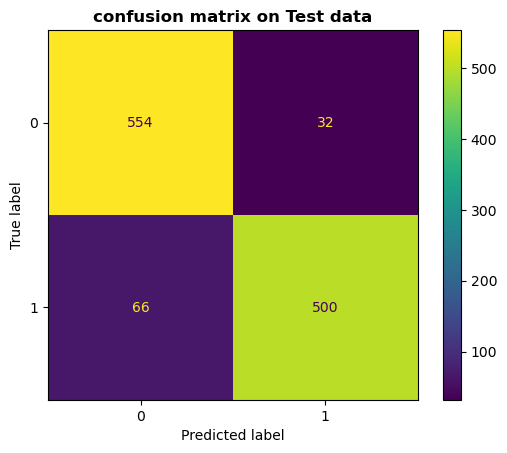

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     0     1     0     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


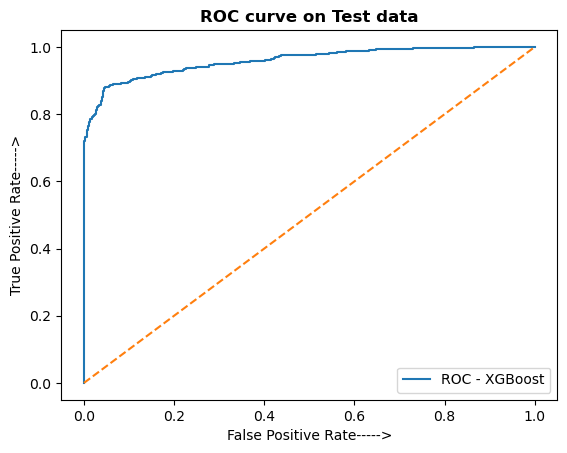

In [111]:
predict(optimal_model, 'XGBoost')

In [112]:
# importance feature
importances = optimal_model.feature_importances_

#Creating a dictonary in order to form the dataframe
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
5,BPMeds,0.223855
2,education,0.164754
4,cigsPerDay,0.158868
1,age,0.097843
7,prevalentHyp,0.043392
3,sex,0.042870
13,pulse_pressure,0.042781
11,heartRate,0.041642
9,totChol,0.036438
12,glucose,0.034718


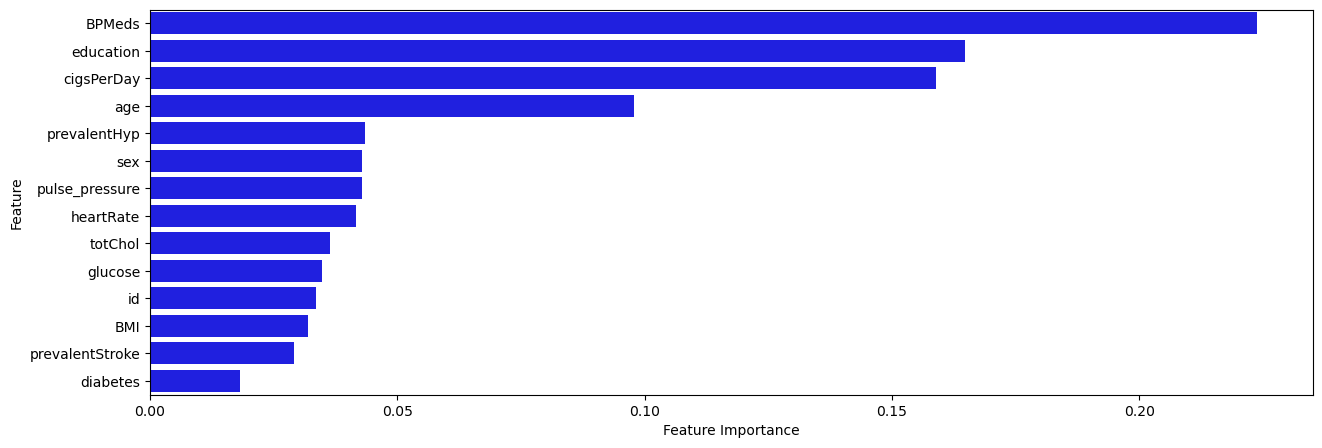

[16:09:51] WARNING: /opt/conda/conda-bld/xgboost-ext_1694783357525/work/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END learning_rate=0.1, max_depth=6, min_samples_leaf=8, min_samples_split=7, n_estimators=1000; total time=   6.1s
[16:09:57] WARNING: /opt/conda/conda-bld/xgboost-ext_1694783357525/work/src/learner.cc:627: 
Parameters: { "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] E

In [113]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

### 9.8 Light Gradient Boosting

#### HyperParameter Tunning using GridSearchCV

In [114]:
lgb_params = {'n_estimators': [1000],   # number of trees in the ensemble
          'max_depth': [7,9],           # maximum number of levels allowed in each tree.
          'min_samples_split': [4,5],   # minimum number of samples necessary in a node to cause node splitting.
          'min_samples_leaf': [4,6],    # minimum number of samples which can be stored in a tree leaf.
          'learning_rate':[0.1]}        # optimization algorithm that determines the step size at each iteration while moving toward a minimum of a loss function.


# performing Hyperparameter Tunning using GridSearchCV
lgb = LGBMClassifier(objective='binary')
lgb_gridsearch = GridSearchCV(estimator=lgb, param_grid=lgb_params, cv=5, verbose=2, n_jobs=-1)
lgb_gridsearch.fit(X_train,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=6. Current value: min_data_in_leaf=6
[LightGBM] [Warning] Unknown parameter: min_samples_split


GridSearchCV(cv=5, estimator=LGBMClassifier(objective='binary'), n_jobs=-1,
             param_grid={'learning_rate': [0.1], 'max_depth': [7, 9],
                         'min_samples_leaf': [4, 6],
                         'min_samples_split': [4, 5], 'n_estimators': [1000]},
             verbose=2)

In [115]:
optimal_model = lgb_gridsearch.best_estimator_
optimal_model

LGBMClassifier(max_depth=9, min_samples_leaf=6, min_samples_split=4,
               n_estimators=1000, objective='binary')

train accuracy : 1.0
test accuracy : 0.915
train precision : 1.0
test precision : 0.95
train recall : 1.0
test recall : 0.873
train f1 : 1.0
test f1 : 0.91
train roc_auc : 1.0
test roc_auc : 0.962
--------------------------------------------------------------------------------
classification report for test data 
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       586
           1       0.95      0.87      0.91       566

    accuracy                           0.91      1152
   macro avg       0.92      0.91      0.91      1152
weighted avg       0.92      0.91      0.91      1152

--------------------------------------------------------------------------------


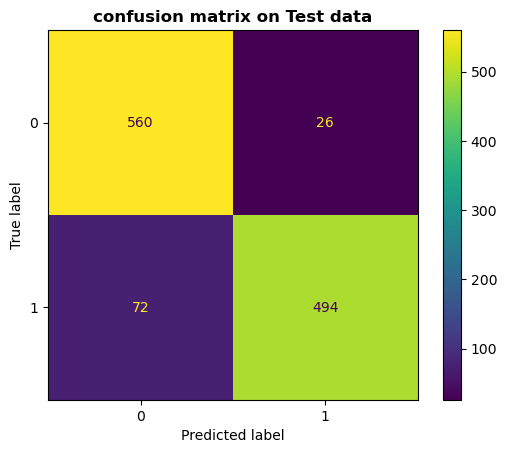

--------------------------------------------------------------------------------
           3638  5230  1296  5413  3762  2836  5626  4856  3929  2074
y_actual      1     1     0     1     1     0     1     1     1     0
y_predict     0     1     0     1     1     0     1     1     1     0
--------------------------------------------------------------------------------


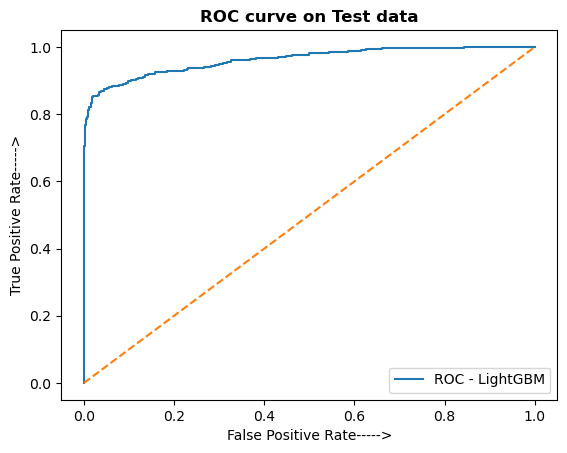

In [116]:
predict(optimal_model, 'LightGBM')

In [117]:
# importance feature
importances = optimal_model.feature_importances_

#Creating a dictonary in order to form the dataframe
importance_dict = {'Feature' : list(X.columns),
                   'Feature Importance' : importances}

#Creating the dataframe
importance = pd.DataFrame(importance_dict)
sorting_features = importance.sort_values(by=['Feature Importance'],ascending=False)
sorting_features

,Feature,Feature Importance
0,id,4547
10,BMI,3845
13,pulse_pressure,3737
9,totChol,3653
12,glucose,3525
11,heartRate,3380
1,age,2814
4,cigsPerDay,2053
2,education,1406
3,sex,400


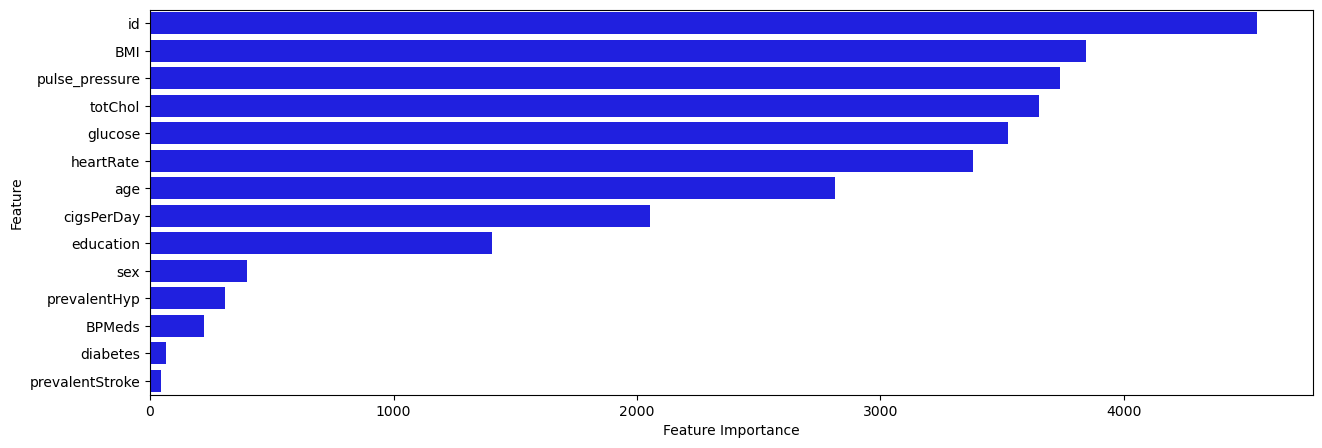

In [118]:
# plotting feature importance graph
plt.figure(figsize=(15,5))
sns.barplot(x='Feature Importance', y='Feature', data=sorting_features, color='blue')
plt.show()

# 10. Model Result

In [119]:
model_result = pd.DataFrame(model_result)
round(model_result,3)

,model,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,train_roc_auc,test_roc_auc
0,LogisticRegression,0.678,0.675,0.676,0.684,0.690,0.631,0.683,0.656,0.746,0.750
1,SVM,0.796,0.750,0.789,0.733,0.810,0.772,0.799,0.752,0.873,0.836
2,KNN,1.000,0.814,1.000,0.749,1.000,0.936,1.000,0.832,1.000,0.816
3,DecisionTree,1.000,0.773,1.000,0.752,1.000,0.800,1.000,0.776,1.000,0.773
4,RandomForest,0.966,0.863,0.982,0.876,0.949,0.839,0.965,0.857,0.996,0.937
5,AdaBoost,0.822,0.818,0.842,0.831,0.794,0.790,0.817,0.810,0.901,0.903
6,XGBoost,1.000,0.915,1.000,0.940,1.000,0.883,1.000,0.911,1.000,0.959
7,LightGBM,1.000,0.915,1.000,0.950,1.000,0.873,1.000,0.910,1.000,0.962


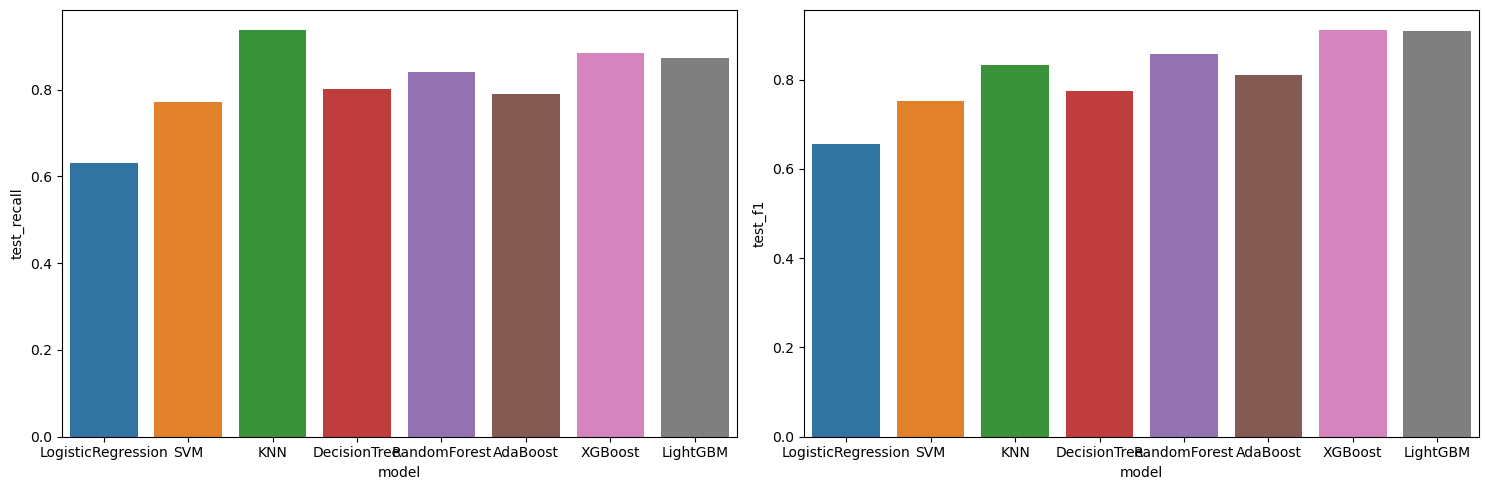

[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.4s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=   3.4s
[LightGBM] [Warning] min_data_in_leaf is set with min_child_samples=20, will be overridden by min_samples_leaf=4. Current value: min_data_in_leaf=4
[LightGBM] [Warning] Unknown parameter: min_samples_split
[CV] END learning_rate=0.1, max_depth=7, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   3.0s
[LightGBM] [Warning] m

In [120]:
# plotting graph to compaire model performance of all the models
fig, axs = plt.subplots(1,2, figsize=(15,5))
sns.barplot(x=model_result['model'], y=model_result['test_recall'], ax=axs[0])   # Model vs Recall score
sns.barplot(x=model_result['model'], y=model_result['test_f1'], ax=axs[1])       # Model vs F1 score 
plt.tight_layout()

# 9. Conclusion
In this project, we tackled a classification problem in which we had to classify and predict the 10-year risk of future coronary heart disease (CHD) for patients. The goal of the project was to develop a tool for the early detection and prevention of CHD, addressing a significant public health concern using machine learning techniques.

1.There were approximately 3390 records and 17 attributes in the dataset.

2.We started by importing the dataset, and necessary libraries and conducted exploratory data analysis (EDA) to get a clear insight into each feature by separating the dataset into numeric and categoric features. We did Univariate, Bivariate, and even multivariate analyses.

3.After that, the outliers and 510 null values were replaced by value of mean, median, mode of all values from the raw data and treated. Data were transformed to ensure that it was compatible with machine learning models.

4.In feature engineering we transformed raw data into a more useful and informative form, by creating new features and understanding important features. We handled target class imbalance using SMOTE.

5.Then finally cleaned and scaled data was sent to various models, the metrics were made to evaluate the model, and we tuned the hyperparameters to make sure the right parameters were being passed to the model. To select the final model based on requirements, we checked model_result.

6.When developing a machine learning model, it is generally recommended to track multiple metrics because each one highlights distinct aspects of model performance. We are, however, focusing more on the Recall score and F1 score because we are dealing with healthcare data and our data is unbalanced.

7.With an f1-score of 0.910 and a recall score of 0.863 on test data, we have noticed that LightGBM Classifier outperforms all other models. It is safe to say that the LightGBM Classifier is the best option for our issue if the f1-score is to be considered.

8.Our highest recall score, 0.938%, came from KNN.

9.The XGBoost and RandomForestClassifier tree-based algorithms also provided the best approach to achieving our goal. We were successful in achieving a respective f1-score of 0.904 and 0.893.

10.The recall score is of the utmost significance in the medical field, where we place a greater emphasis on reducing false negative values because we do not want to mispredict a person's safety when he is at risk. With recall scores of 0.938, 0.870, and 0.863, respectively, KNN, XGB, and LGBM performed the best.

Last but not least, we can select the Final model as our KNN classifier due to its highest recall score. It is acceptable to classify a healthy individual as having a 10-year risk of coronary heart disease CHD (false positive) and to follow up with additional medical tests; however, it is categorically unacceptable to miss identifying a particular patient or to classify a particular patient as healthy (false negative).